# Assignment 1 - Linear Least Squares Regression (VERSION 2)


## *Aspen Morgan*
Netid: 790907699

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/main/notebooks/assignment_instructions.ipynb), and is also linked to from the course syllabus.


The primary reference for this assignment is chapters 2 and 3 of our textbook [Understanding Deep Learning](https://udlbook.github.io/udlbook/).

Some of the following references may also be helpful for reviewing calculus or linear algebra:
- [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf) by Deisenroth, Faisal, and Ong
- [Deep Learning](https://www.deeplearningbook.org/); Part I: Applied Math and Machine Learning Basics by Goodfellow, Bengio, and Courville

*Note: don't worry if you don't understand everything in the references above - some of these books dive into significant minutia of each of these topics.*

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

## 1 Supervised vs Unsupervised Learning
**[20 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**


**(a)** This is a regression problem since CEO salary is a continuous variable. We are interested in inference since we care about the factors more than predicting a certain CEOs salary. There are 500 samples, n, from the 500 companies and there are three predictor variables, p, which are profit, number of employees, and industry.

**(b)** This is a prediction classification problem since we are predicting a binary (success vs failure). There are 20 samples and there are 13 predictor variables.

**(c)** This is a regression problem since % change is a continuous value and its a prediction problem. There are 52 samples since there is one sample per week in 2012 and there are three predictor variables.

## 2 Simple Linear Least Squares Regression
**[40 points] Build your own linear regression algorithm**.

In this problem you will solve a single-variable linear least squares (LLS) regression problem. Assume that our data was generated by the following model: $Y = wx + E $  where $x \in R$, $w \in R$, and  $E \sim N(0,\sigma^{2})$. Here we assume $\sigma$ is some unknown variance of our noise.

**(a)** Given some collection of observations from this model of the form $d=(x_{i},y_{i})_{i=1}^{N}$, write out the derivation for the linear least squares solution for $w$, given in terms of $x_{i}$ and $y_{i}$, using calculus.  Show your work!  This should involve at least a few lines of math.  Please clearly label the final formula for calculating your weights.     

**(b)** Build a working version of a *single variable* LLS regression model using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for LLS that means estimating the weight parameters) and `predict` which uses the estimated weights to predict y for new settings of x.  For training, use the formula you derived in part (a) to infer the weights.

**(c)** Create a synthetic dataset using the following model: $Y = 2x + E$  where $x \in R$, and  $E \sim N(0,1)$. Following common convention, we use capital letters to denote random variables, and lower-case letters to denote non-random variables.  Using this approach to generate has several benefits: it allows us to  can control the amount of data available for training and testing our LLS model, and we know in advance precisely what the best possible solution to our problem is!   

Begin by sampling $N=50$ values for $x_{i} \sim U[-5,5]$, where $U[a,b]$ is a uniform distribution with lower bound of $a$ and an upper bound of $b$.  Then use these $x$ values to generate a dataset of $d = (x_{i},y_{i})_{i=1}^{N}$,where for each $x_{i}$ you get the corresponding $y_{i}$ value by passing it through the model given above.  To check the validity of your data, make a scatter plot of the points, and on these same axes, plot the line $y= 2x$.  Please briefly comment (2-4 sentences) upon whether the data looks correct, and why you think it is correct.       

**(d)** Split the data above into two *disjoint* subsets, each with half of the data (25 data points each).  Lets call these $d_{TR}$ and $d_{TE}$.  Feed $d_{TR}$ into your single_variable_lls "fit" method. Then use your "predict" method to make predictions for the points in both the $d_{TE}$ and $d_{TR}$ datasets.  Please report the mean square error (MSE) on both the training and testing datasets, respectively.  For full credit, please clearly label these values in your answer below.

**(e)** Please make a figure with two axes on it: (i) in the first axes please scatter plot the training data, the true underlying function (i.e., $y = 2x$), and the line created by using your LLS weights; (ii) on the second axes scatter plot the testing data, the true underlying function, and the line created by your LLS model.  For full credit, please make sure you include titles, legend, and labels for the axes on all of your plots. Please use these plots to determine that your implementation of LLS is working properly.

**(f)** Please comment on the results you obtained in parts (d) and (e).  How do the MSE values obtained on the training and testing sets compare to one another?  If you ran this experiment again would you expect the same pattern, and why?





**ANSWER**

**(a)**

(Only 1 predictor variable, so $x_{i,0}=1$ and I will use $x_i$ to denote $x_{i,1}$)

$y = wx + E$

Using MSE as cost function to calculate error:

$C(w) = \Sigma_{i=1}^{N}\frac{1}{N}(y_i - \hat{y_i})^2$

We can use slope-intercept form: $\hat{y_i}=w^Tx_i=w_0+w_1x_i$

OR point-slope form: ($\hat{y_i}-\bar{y_i})=w_1(x_{i}-\bar{x_{i}})$ and $\hat{y_i}=\bar{y_i} + w_1(x_{i}-\bar{x_{i}})$. 

Point-slope form will enable better formatting later on:

$C(w) = \Sigma_{i=1}^{N}\frac{1}{N}(y_i - (\bar{y_i} + w_1(x_{i}-\bar{x}_{i}))^2 = \Sigma_{i=1}^{N}\frac{1}{N}((y_i - \bar{y_i}) - w_1(x_{i}-\bar{x}_{i}))^2$

Take gradient with respect to weights (w):

$\nabla_wC(w) = \frac{1}{N}\nabla_w\Sigma_{i=1}^{N}((y_i - \bar{y_i}) - w_1(x_{i}-\bar{x}_{i}))^2$

$\nabla_{w}C(w) = \frac{2}{N}\Sigma_{i=1}^{N}((y_i - \bar{y_i}) - w_1(x_{i}-\bar{x}_{i}))*(x_{i}-\bar{x}_{i})$ 

Set gradient equal to zero to find absolute min:

$\frac{2}{N}\Sigma_{i=1}^{N}((y_i - \bar{y_i}) - w_1(x_{i}-\bar{x}_{i}))*(x_{i}-\bar{x}_{i})=0$

$\Sigma_{i=1}^{N}(y_i - \bar{y_i})(x_{i}-\bar{x}_{i}) = w_1\Sigma_{i=1}^{N}(x_{i}-\bar{x}_{i})*(x_{i}-\bar{x}_{i})$

$w_1 = \frac{\Sigma_{i=1}^{N}(y_i - \bar{y_i})(x_{i}-\bar{x}_{i})}{\Sigma_{i=1}^{N}(x_{i}-\bar{x}_{i})^2}$

and since $\hat{y_i}=\bar{y_i} + w_1(x_{i}-\bar{x_{i}}) = w_1x_{i} + (\bar{y_i} -w_1\bar{x_{i}})$,

bias = $w_0 = \bar{y_i} - w_1*\bar{x_i}$




**(b)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Skeleton code for part (b) to write your own linear least squares regressor
class single_variable_lls:
    def __init__(self):
        self.w = 0
        self.y_bar = 0

    def fit(self, x, y):
        if len(y) != len(x):
            raise ValueError('x and y must be same size.')
        
        y_bar = np.mean(y)
        x_bar = np.mean(x)

        n, d = 0.0, 0.0
        for i in range(0, len(x)):
            n += (y[i]-y_bar)*(x[i]-x_bar)
            d += (x[i]-x_bar)**2

        # Store the estimated weight and bias term
        self.w = n / d
        self.bias = y_bar - self.w*x_bar
        

    def predict(self, x):
        return self.w*x + self.bias

# Metric of overall classification accuracy
def error(y, y_hat):
    nvalues = len(y)
    mse = np.linalg.norm(y-y_hat) / nvalues
    return mse

**(c)**

In [5]:
# sample 50 values in U[-5, 5]
x = 10*np.random.rand(50) - 5

# standard normal distribution
E = np.random.randn(50)

# Y = 2
Y = 2*x + E

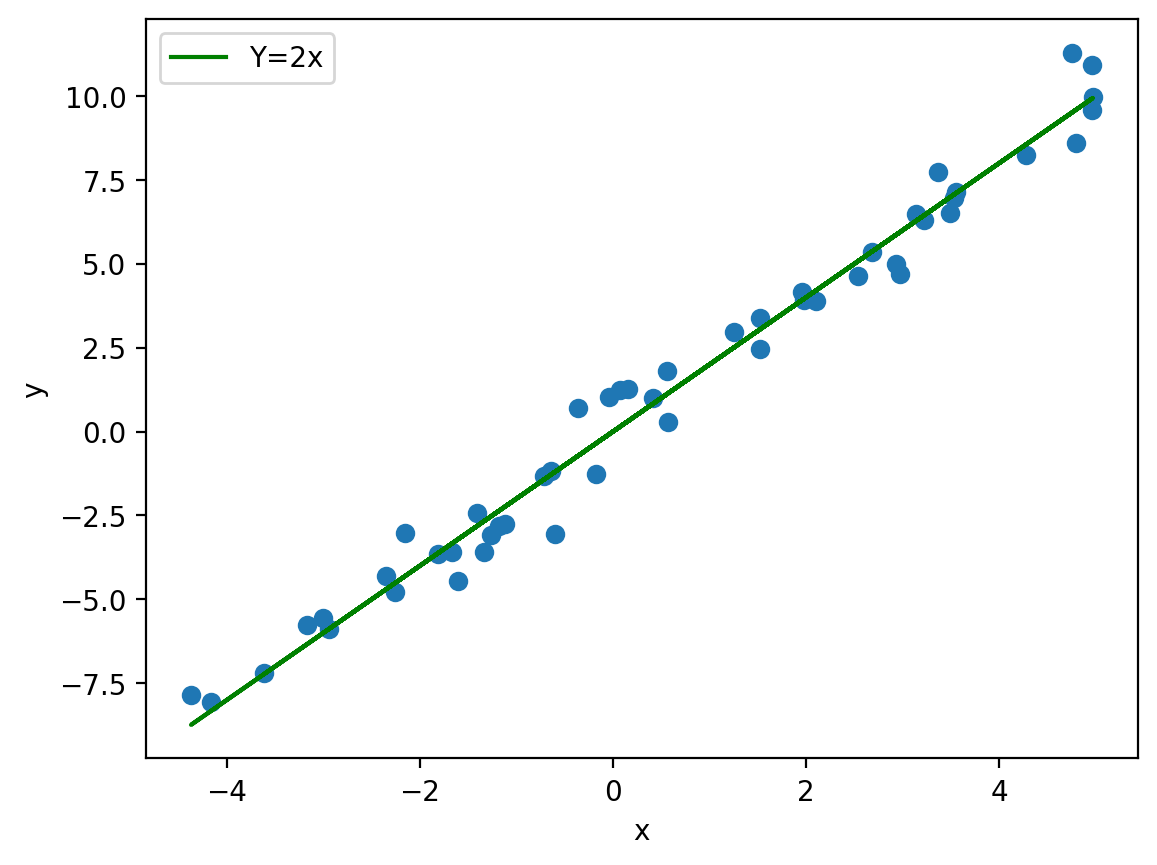

In [6]:
plt.scatter(x, Y)
plt.plot(x, 2*x, color='green', label='Y=2x')
plt.ylabel('y')
plt.xlabel('x')
plt.legend();

The scattered points look correct for Y=2x+N(0,1) since the noise is limited and ununiform and the points are all close to the y=2x line. Although x is lowercase and supposed to be non-random, we need to "sample" from a uniform distribution which means selecting random values. It is equally likely that any x value will be selected in [-5, 5] and the x values are usually not going to be evenly spaced (consitent with the graph.)

**(d)**

In [7]:
# choose 25 random indicies
half = len(x) // 2
indicies = np.array(range(0, 50))
training = np.random.choice(indicies, half, False)
testing = np.setdiff1d(indicies, training)

# training
x_tr = x[training]
Y_tr = Y[training]

# testing
x_te = x[testing]
Y_te = Y[testing]

In [8]:
# fit to training data
lin_reg = single_variable_lls()
lin_reg.fit(x_tr, Y_tr)

# apply to training data
Y_tr_pred = lin_reg.predict(x_tr)

# training MSE
print('Training MSE: ', error(Y_tr, Y_tr_pred))

# apply to testing data
Y_te_pred = lin_reg.predict(x_te)

# testing MSE
print('Testing MSE: ', error(Y_te, Y_te_pred))

Training MSE:  0.1215663583035752
Testing MSE:  0.17294401267598572


**(e)**

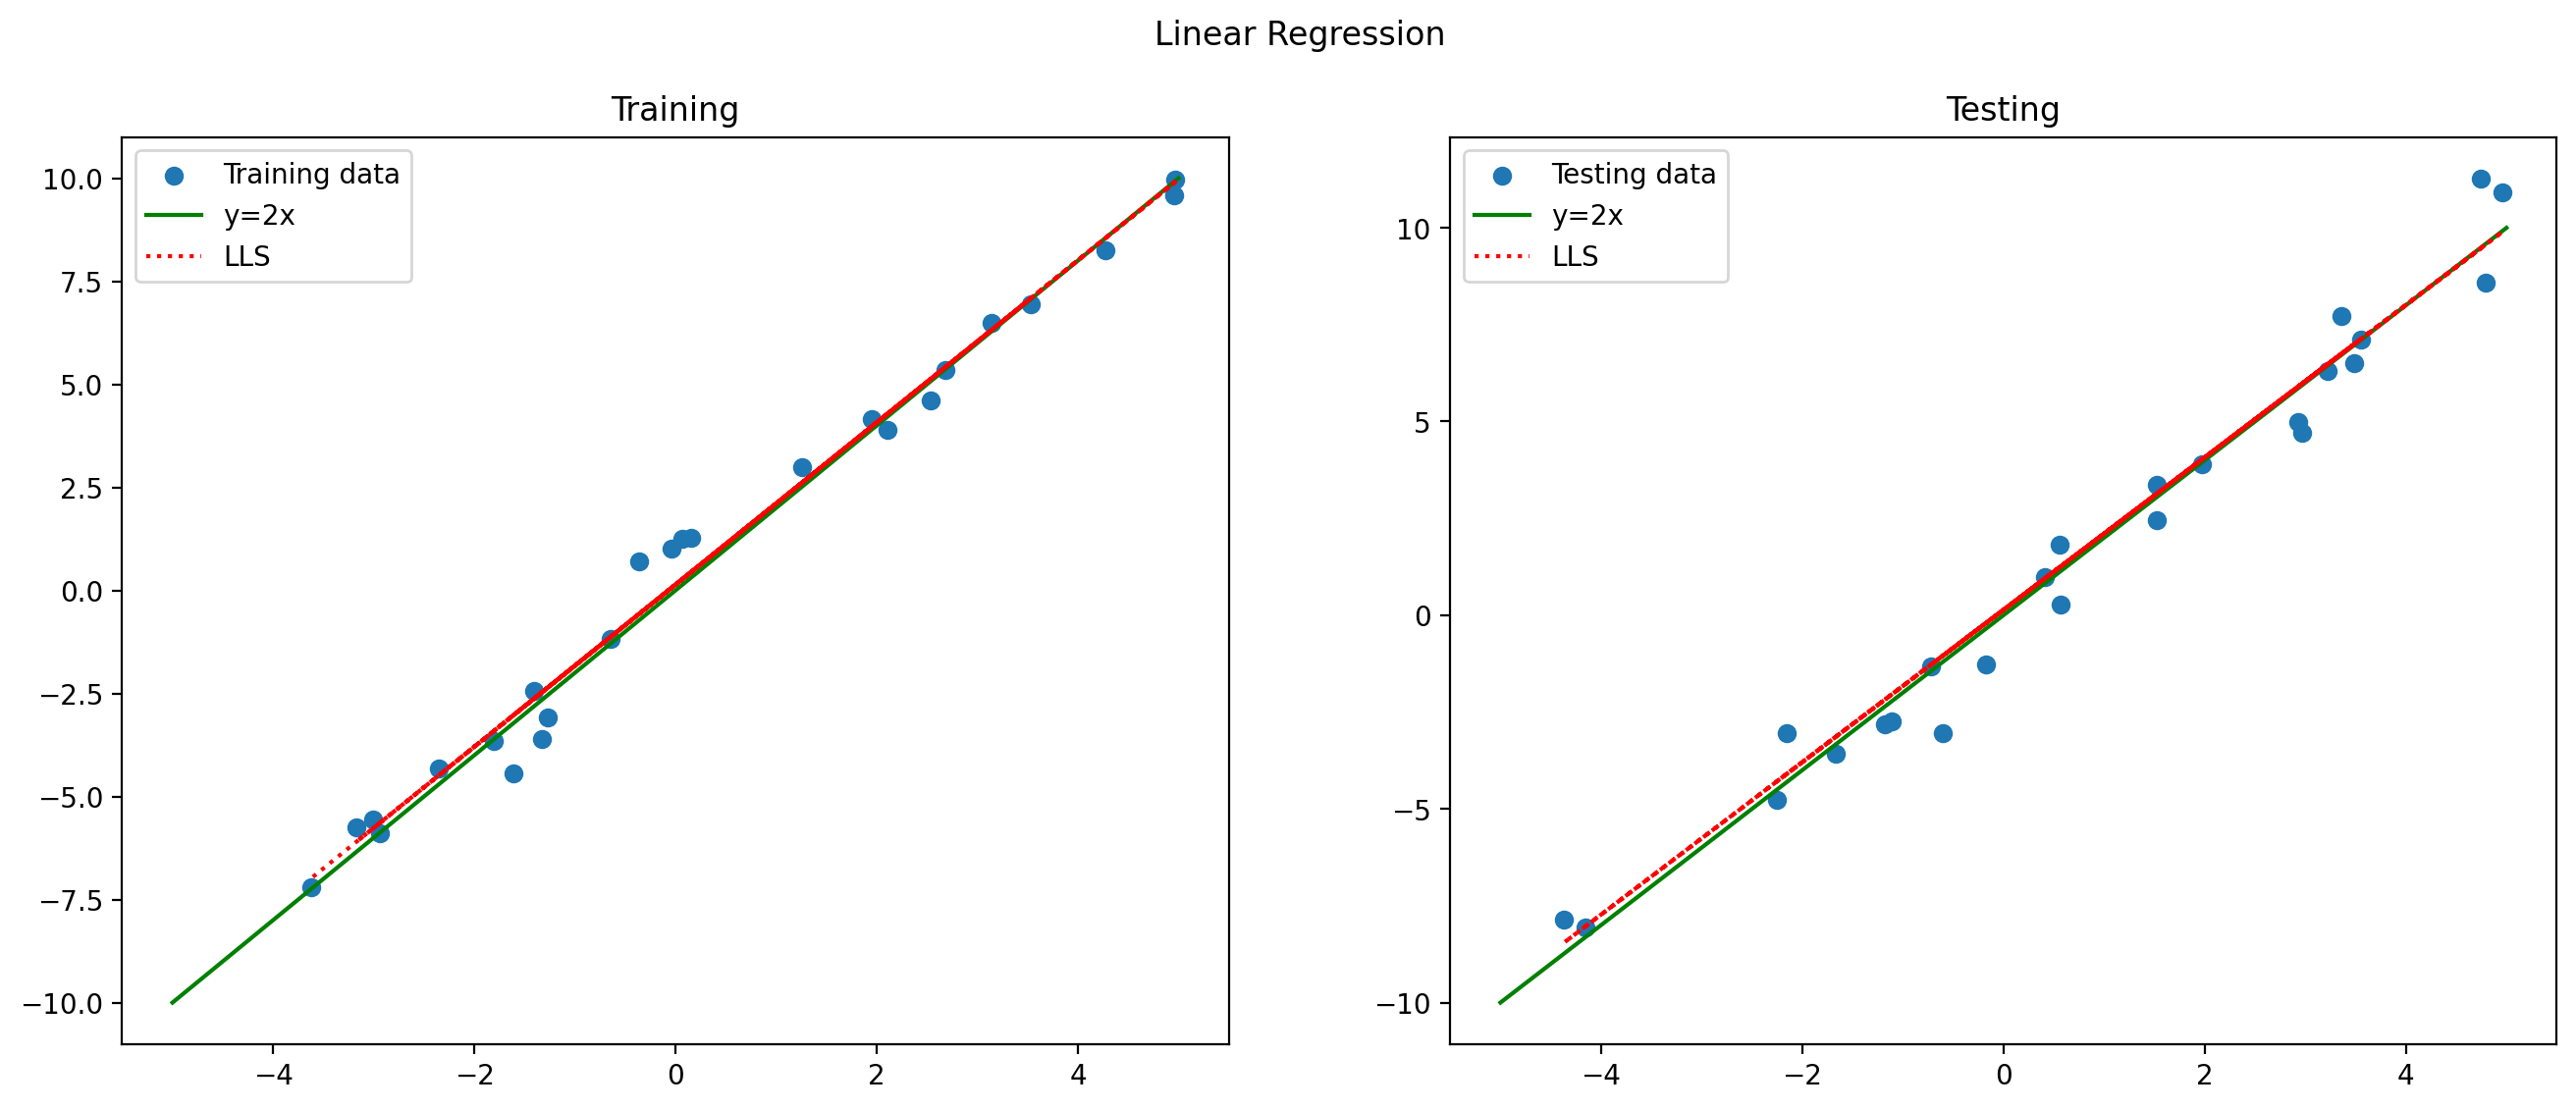

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(x_tr, Y_tr, label='Training data')
ax[0].plot([-5, 5], [-10, 10], color='green', label='y=2x')
ax[0].plot(x_tr, Y_tr_pred, ':', color='red', label='LLS')
ax[0].legend()
ax[0].set_title('Training')
ax[1].scatter(x_te, Y_te, label='Testing data')
ax[1].plot([-5, 5], [-10, 10], color='green', label='y=2x')
ax[1].plot(x_te, Y_te_pred, ':', color='red', label='LLS')
ax[1].legend()
ax[1].set_title('Testing')
fig.suptitle('Linear Regression');

**(f)**

**Conclusions:**
* The training MSE is slightly better than the testing MSE. Thats means the linear regression line is slighly overfitting to the training data. Both errors are very low because the actual relationship between x and y is indeed linear. 
* If I ran this experiment again, I would expect nearly identical results. There are only 25 training points so I would expect the LLS line to not be quite y=2x but very close.

## 3 Constructing a Shallow Neural Network
**[20 points] Build your own llinear regression algorithm**.

In this problem you will construct a shallow neural network (i.e., one hidden layer) like Fig. 3.4(b) of our "Understanding Deep Learning" textbook.  Your goal is to create a neural network that can produce the single-variable function given by the figure below.  Specifically, your challenge is to choose the number of hidden neurons, and the weight and bias settings of the network to produce the desired output shown in the figure. I have provided the code for a relu function below.  I strongly recommend you read Ch. 3 before attempting to solve this problem.

**(a)** Fill in the code skeleton below called "my_nn" with an implementation of a shallow network that produces the function in the figure.

**(b)** Demonstrate that your shallow network produces the desired output by plotting the output of your "my_nn" over 50 uniformly sampled x-values within the range $x\in[0,1]$. Please place a grid on the plot so that it is easy to verify that your code reproduces the desired function closely.

Text(0.5, 0, 'y')

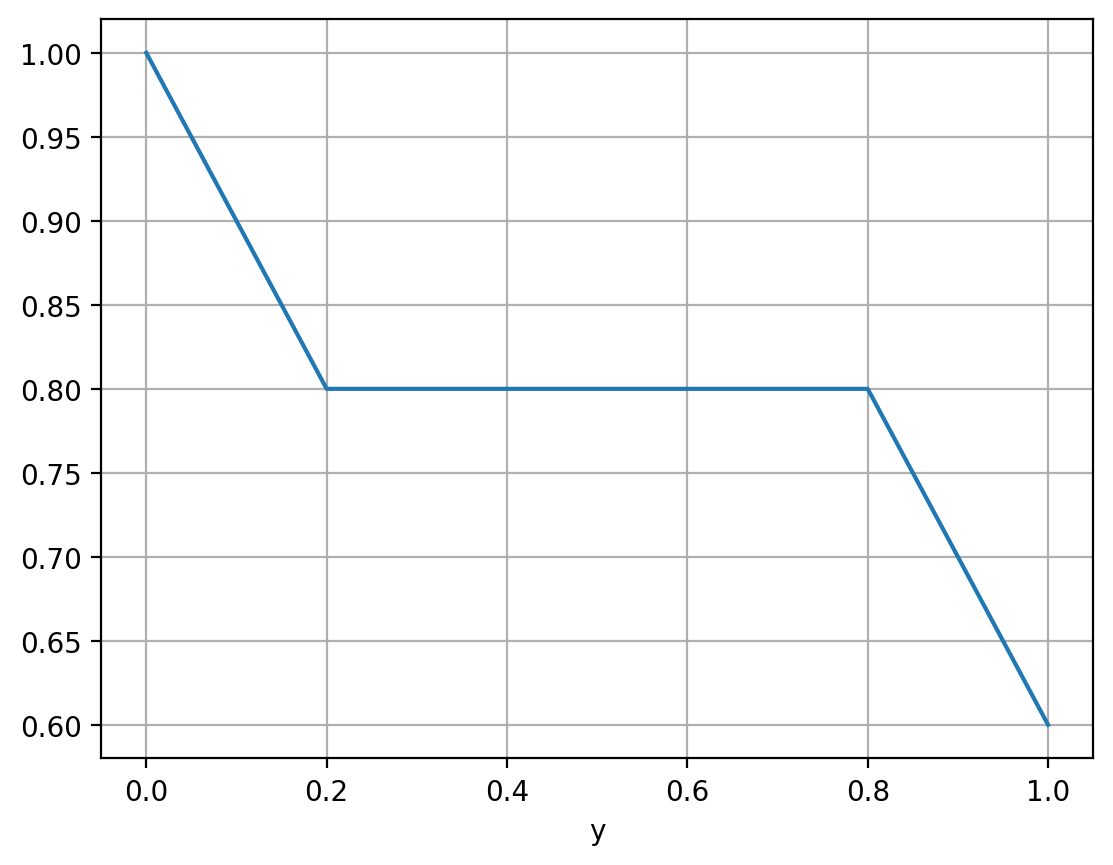

In [10]:
# TARGET FUNCTION
x = [0,0.2,0.8,1]
y = [1,0.8,0.8,0.6]
plt.plot(x,y)
plt.grid()
plt.xlabel('x')
plt.xlabel('y')

In [11]:
def relu(x_values):
    output = []
    for x in x_values:
        output.append(max(0.0, x))
    return output

**ANSWER**

In [12]:
def my_nn(x):
    h1 = np.array(relu(-x+0.2))
    h2 = np.array(relu(x-0.8))
    phi1 = 1
    phi2 = -1
    y = phi1*h1 + phi2*h2 + 0.8
    return y

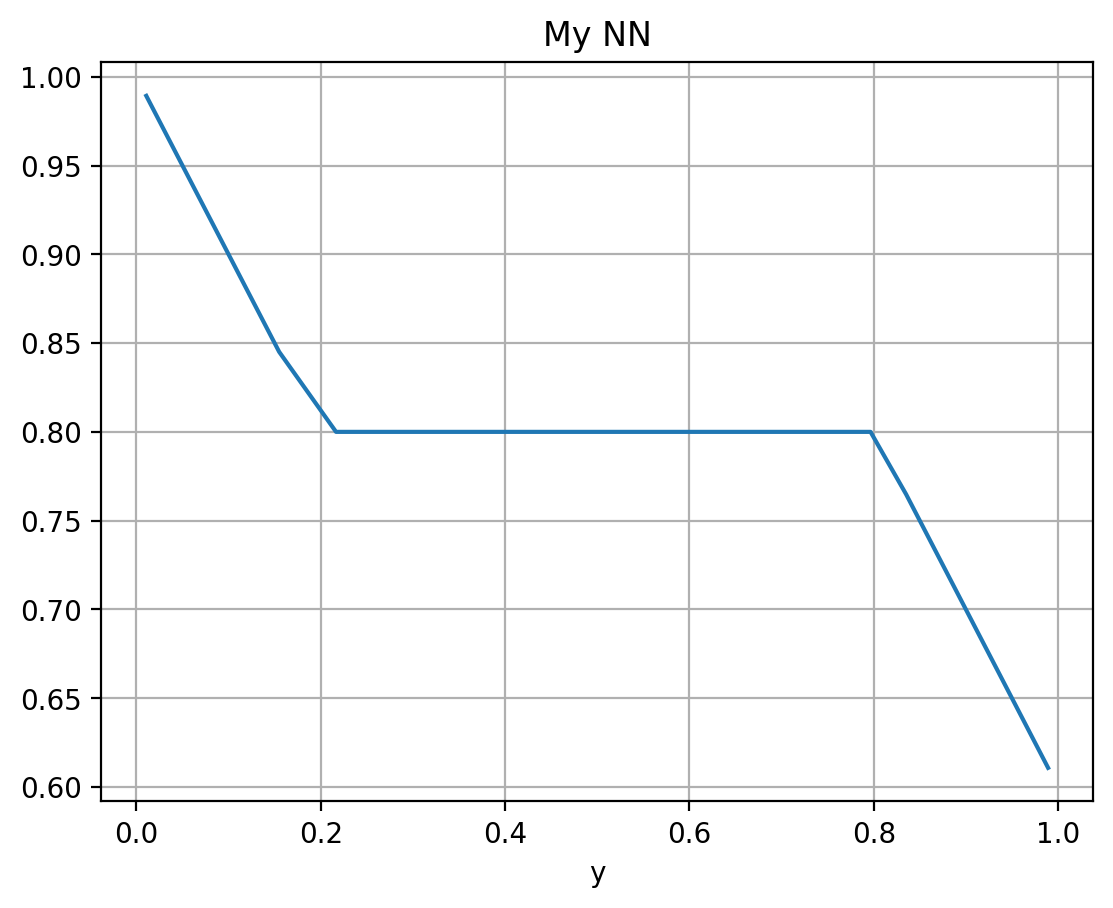

In [16]:
import numpy as np
x = np.sort(np.random.rand(50))
y = my_nn(x)
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.xlabel('y')
plt.title('My NN');